# Wichmann Hill

In [3]:
def wichmannHill(s1, s2, s3, n):
    rand = []
    for i in range(n):
        s1 = 171*s1 % 30269
        s2 = 172*s2 % 30307
        s3 = 170*s3 % 30323
        u = (s1/float(30269)+s2/float(30307)+s3/float(30323)) % 1
        rand.append(u)
    return rand
print wichmannHill(12364,20000,30000,10)

%matplotlib inline 

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math

[0.5427860255742816, 0.1323778597056413, 0.3613483709836176, 0.7604176467959922, 0.4860959758634751, 0.3192763080941674, 0.12823718936743989, 0.5525359199348738, 0.5397243970602233, 0.398971939755143]


# Wichmann Hill Histogrma con S1:29345, S2:17347, S3:27630, n=10000

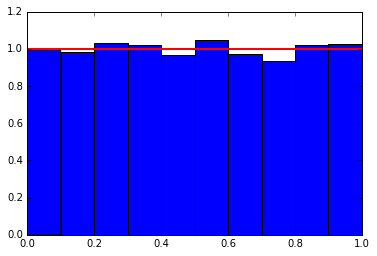

In [2]:
x = wichmannHill(29345, 17347, 27630, 10000)
count, bins, ignored = plt.hist(x, 10, normed=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

# Wichmann Hill Histogrma con S1:13092, S2:26347, S3:13074, n=10000

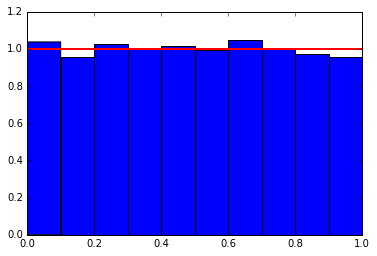

In [3]:
x = wichmannHill(13092, 26347, 13074, 10000)
count, bins, ignored = plt.hist(x, 10, normed=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

# Area de Circulo con Wichmann Hill 
### Coordenada en X = S1:29345, S2:17347, S3:27630, n=10000
### Coordenada en Y = S1:13092, S2:26347, S3:13074, n=10000
### Radio 7

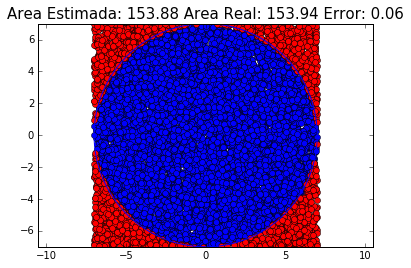

In [3]:
def calcularArea(r):
    graficaAzulX = []
    graficaAzulY = []    
    graficaRojoX = []
    graficaRojoY = []
    r2 = r**2
    randX = wichmannHill(29345, 17347, 27630, 10000)
    randY = wichmannHill(13092, 26347, 13074, 10000)
    N = 0
    areaEstimada = 0
    for i in range(len(randX)):
        xy = ((randX[i]*2*r)-r)**2 + ((randY[i]*2*r)-r)**2
        if r2 >= xy:
            N += 1
            graficaAzulX.append((randX[i]*2*r)-r)
            graficaAzulY.append((randY[i]*2*r)-r)
        else:            
            graficaRojoX.append((randX[i]*2*r)-r)
            graficaRojoY.append((randY[i]*2*r)-r)
    areaEstimada = N/float(len(randX))*(2*r)**2
    fig, ax = plt.subplots()
    ax.plot(graficaAzulX, graficaAzulY, 'o', color='blue')
    ax.plot(graficaRojoX, graficaRojoY, 'o', color='red')
    an = np.linspace(0, 2*np.pi, 100)
    plt.plot(r*np.cos(an), r*np.sin(an))
    plt.axis('equal')
    plt.axis([-r, r, -r, r])
    area = math.pi*r**2
    error = abs(area-areaEstimada)
    suptitle = 'Area Estimada: '+str(round(areaEstimada*100)/100)+' Area Real: '+str(round(area*100)/100)+' Error: '+str(round(error*100)/100)
    plt.title(suptitle, fontsize=15)
    
    plt.show()
calcularArea(7)